#NB : Dans tout le test, il est demandé d'utiliser au maximum les fonctionnalités offertes par le module "pandas".
 
#Les données sont des articles réels concernant les chaussures de sport Mizuno. Elles ont été extraites de deux sources différentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Étape 1: Importer les tables 

In [3]:
#import sys
#print(sys.argv[0]) #obtenir le chemin de travail

In [4]:
import  os
print(os.getcwd()) #obtenir le chemin de travail

path = os.getcwd()

E:\question_python


In [5]:
#print(os.path.abspath('.')) #obtenir le chemin de travail

In [6]:
a = pd.read_csv("data1.csv",sep=",")
b = pd.read_csv("data2.csv",sep=",")

In [7]:
a.tail()

,names,prices,source,is_male
20,MIZUNO Wave Inspire 14 Femme Noir / Blanc / Bleu,145,from_mizuno,0
21,MIZUNO Wave Ultima 9 Femme Bleu / Bleu / Rose,135,from_running,0
22,Mizuno Wave Sonic - Femme - Jaune / Noir,120,from_running,0
23,MIZUNO WAVE ULTIMA 10 Femme | Hawaiian Ocean/W...,135,from_running,0
24,MIZUO WAVE MUJIN 6 Homme | Blue Sapphire / Ena...,145,from_mizuno,1


In [8]:
b.tail()

,names,prices,source,is_male
17,MIZUNO WAVE RIDER 22 Homme | Ombre Blue/Safety...,145,from_running,1
18,MIZUNO WAVE RIDER 22 Femme Blue Attol/White/Ge...,145,from_running,0
19,MIZUNO WAVE DAICHI 4 Femme | Peacock Blue / En...,125,from_running,0
20,MIZUNO WAVE RIDER 22 Femme | Blue Mirage/Fiery...,145,from_running,0
21,MIZUNO WAVE ULTIMA 10 Femme | Blue Mirage/Fier...,135,from_running,0


# Étape 2: Concaténer les tables pour n'en faire qu'une

In [27]:
from pandas import Series,DataFrame,concat

In [28]:
data0=concat([a,b],keys=['a','b'],axis=0)

In [29]:
data0.head()

names  prices        source  \
a 0     MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose     135  from_running   
  1  MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...     125  from_running   
  2  MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...     130  from_running   
  3  MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...     135  from_running   
  4  MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...     145  from_running   

     is_male  
a 0        0  
  1        1  
  2        1  
  3        1  
  4        1

In [30]:
# enlever les lignes doublonnees si il y en a
df = data0.reset_index(drop=True)
# df=concat([a,b],ignore_index=True).drop_duplicates() 

In [31]:
df.tail()

,names,prices,source,is_male
42,MIZUNO WAVE RIDER 22 Homme | Ombre Blue/Safety...,145,from_running,1
43,MIZUNO WAVE RIDER 22 Femme Blue Attol/White/Ge...,145,from_running,0
44,MIZUNO WAVE DAICHI 4 Femme | Peacock Blue / En...,125,from_running,0
45,MIZUNO WAVE RIDER 22 Femme | Blue Mirage/Fiery...,145,from_running,0
46,MIZUNO WAVE ULTIMA 10 Femme | Blue Mirage/Fier...,135,from_running,0


# Étape 3:  Donner le nombre d'observations pour chaque source

In [14]:
df[['source','prices']].groupby('source').count().rename(columns={'prices':'nombre'})

,nombre
source,
from_mizuno,20
from_running,27


In [15]:
grouped = df.groupby('source')
# grouped

In [16]:
#Regrouper les observations par source
grouped.groups 

{'from_mizuno': [6, 7, 8, 10, 11, 12, 15, 16, 18, 19, 20, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'from_running': [0, 1, 2, 3, 4, 5, 9, 13, 14, 17, 21, 22, 23, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]}

In [17]:
grouped.count() #on calcule le nombre d'observations par chaque source 

#Reponse: Parmi 47 observations, il y en a 20 pour la source de 'from_mizuno' et 27 pour la source de 'from_running'

#Remarque: 
#Dans le SQL: on le fait par : SELECT source,COUNT(*) AS NB_PRODUITS_PAR_SOURCE FROM table GROUP BY 1

,names,prices,is_male
source,,,
from_mizuno,20,20,20
from_running,27,27,27


In [18]:
#on peut quand meme calculer les statistiques par groupe de source
#grouped.sum() 
#grouped.mean()
#grouped.median()
#grouped.std()
#grouped.var()
#grouped.min()
#grouped.max()

In [19]:
grouped.sum() 
#interpretation de '11': 
#dans le groupe des observations dont source est 'from_mizuno', il y a au total 11 observations qui est marque 1 pour le feature is_male 
#car il y a que deux valeurs 1 et 0 pour ce feature

,prices,is_male
source,,
from_mizuno,2950,11
from_running,3760,14


# Étape 4: Faire des statistiques descriptives sur le prix des articles

In [20]:
df.head()

,names,prices,source,is_male
0,MIZUNO Wave Ultima 9 Femme Bleu / Blanc / Rose,135,from_running,0
1,MIZUNO WAVE DAICHI 4 Homme | Blue Sapphire / E...,125,from_running,1
2,MIZUNO WAVE SHADOW 2 Homme | Blue Jewel/Silver...,130,from_running,1
3,MIZUNO WAVE ULTIMA 11 Homme | Dress Blues / Va...,135,from_running,1
4,MIZUNO WAVE MUJIN 5 Homme Ombre Blue/Silver/Po...,145,from_running,1


In [21]:
prices = list(df['prices'])

print('mean :',round(np.mean(prices),3))
print('median :',np.median(prices))
print('maximum :',np.max(prices))
print('minimum :',np.min(prices))
print('variance :',round(np.var(prices),3))
print('standard deviation :',round(np.std(prices),3))
print('coefficient of variation :',round(np.mean(prices)/np.std(prices),3))

mean : 142.766
median : 145.0
maximum : 180
minimum : 120
variance : 213.626
standard deviation : 14.616
coefficient of variation : 9.768


Coefficient de corrélation

In [33]:
def transfer(x):
    if x == 'from_mizuno':
        x = 1
    elif x == 'from_running':
        x = 0
    return x


df_ici = df[['prices','source','is_male']]
df_ici['source'] = df_ici['source'].apply(lambda x: transfer(x))

In [36]:
df_ici.corr()

,prices,source,is_male
prices,1.000000,0.278765,0.133765
source,0.278765,1.000000,0.031194
is_male,0.133765,0.031194,1.000000


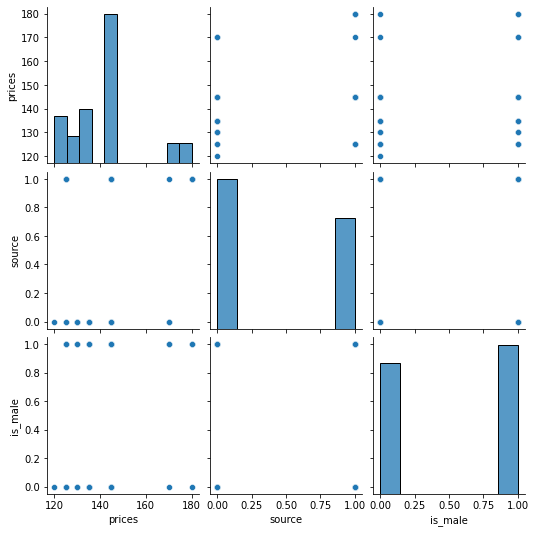

In [37]:
sns.pairplot(df_ici)

<AxesSubplot:>

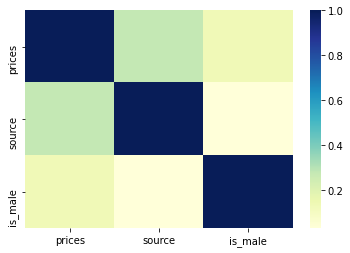

In [51]:
sns.heatmap(df_ici.corr(), cmap ='YlGnBu')

# Étape 5: Faire deux graphiques d'analyse descriptive avec des librairies de votre choix (histogramme, barplot, boxplot, etc...)

In [42]:
df_source

,nb_from_running_par_prix,nb_from_mizuno_par_prix
prices,,
120,1.0,0.0
125,2.0,4.0
130,4.0,0.0
135,8.0,0.0
145,10.0,12.0
170,2.0,1.0
180,0.0,3.0


In [47]:
df_source = df[['source','prices']]

#On calcule nombre des observations par groupe de prix , et encore par groupe de source  
source_running = df_source[df_source['source']=='from_running'].groupby('prices').count()
source_mizuno = df_source[df_source['source']=='from_mizuno'].groupby('prices').count()

#Remarque : 
#Dans le SQL, on le fait par : 
#SELECT prices, SUM(CASE WHEN source='from_running' THEN nb ELSE 0 END) AS nb_from_running_par_prix ,
#SUM(CASE WHEN source='from_running' THEN nb ELSE 0 END) AS nb_from_mizuno_par_prix 
#FROM(SELECT prices, source, count(*) AS nb FROM table GROUP BY 1,2)

df_source = pd.merge(source_running, source_mizuno,
                     on='prices', how='outer').rename(columns={'source_x':'source_running',
                                                               'source_y':'source_mizuno'})
#outer: full join en SQL

#remplacer le null par 0 après la jointure
df_source = df_source.fillna(0)

source_running = list(df_source['source_running'])
source_mizuno = list(df_source['source_mizuno'])
#on applique la fonction anonyme lambda à list(df_source.index) par la fonction map
price_class= list(map(lambda x: str(x), list(df_source.index)))

In [48]:
df_source

,source_running,source_mizuno
prices,,
120,1.0,0.0
125,2.0,4.0
130,4.0,0.0
135,8.0,0.0
145,10.0,12.0
170,2.0,1.0
180,0.0,3.0


In [49]:
price_class

['120', '125', '130', '135', '145', '170', '180']

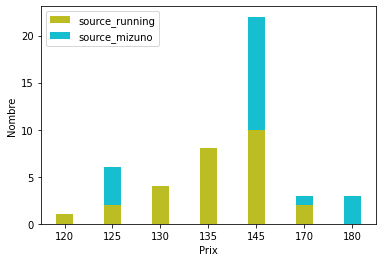

In [50]:
#interprétation: nombre des chaussures par les groupes de prix et les sommes par groupe de source
ind = np.arange(7)
width = 0.35

p1 = plt.bar(ind, source_running, width, color='#bcbd22')
p2 = plt.bar(ind, source_mizuno, width, bottom=source_running, color='#17becf')

plt.xticks(ind, price_class)
plt.xlabel('Prix')
plt.ylabel('Nombre')
plt.title('')

plt.legend((p1,p2),('source_running','source_mizuno'))

In [23]:
df_source = df[['is_male','prices']]

source_male = df_source[df_source['is_male']==1].groupby('prices').count()
source_female = df_source[df_source['is_male']==0].groupby('prices').count()

df_source = pd.merge(source_female, source_male,
                     on='prices', how='outer').rename(columns={'is_male_x':'source_female',
                                                               'is_male_y':'source_male'})

df_source = df_source.fillna(0)

source_male = list(df_source['source_male'])
source_female = list(df_source['source_female'])
price_class= list(map(lambda x: str(x), list(df_source.index)))

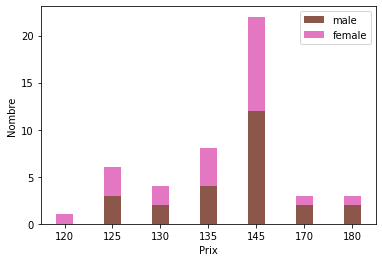

In [24]:
ind = np.arange(7)
width = 0.35

p1 = plt.bar(ind, source_male, width, color='#8c564b')
p2 = plt.bar(ind, source_female, width, bottom=source_male, color='#e377c2')

plt.xticks(ind, price_class)
plt.xlabel('Prix')
plt.ylabel('Nombre')
plt.title('')

plt.legend((p1,p2),('male','female'))

<AxesSubplot:ylabel='prices'>

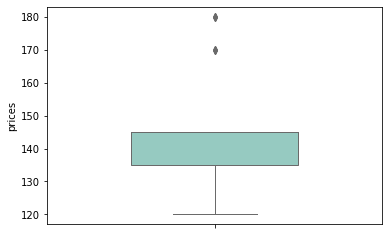

In [25]:
#Les segments de ligne du graphique de haut en bas sont la limite supérieure, le quartile supérieur, la médiane et le quartile inférieur. 
#Les lignes de limite supérieure et inférieure sont 1,5 fois l'intervalle interquartile à partir de la médiane, 
#qui est supérieure au quartile supérieur .
#Les données à la limite ou au-dessous de la limite inférieure sont une valeur aberrante.
sns.boxplot(y='prices',
            data=df,
            width=0.5, linewidth=1, palette='Set3')

<AxesSubplot:xlabel='source', ylabel='prices'>

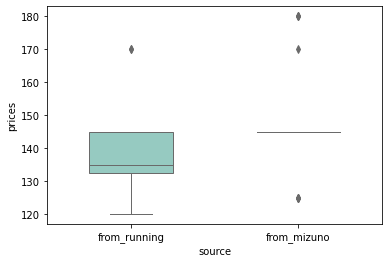

In [26]:
sns.boxplot(x='source', y='prices',
            data=df,
            width=0.5, linewidth=1, palette='Set3')

<AxesSubplot:xlabel='is_male', ylabel='prices'>

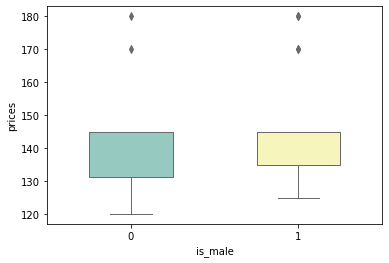

In [27]:
sns.boxplot(x='is_male', y='prices',
            data=df,
            width=0.5, linewidth=1, palette='Set3')

<AxesSubplot:xlabel='source', ylabel='prices'>

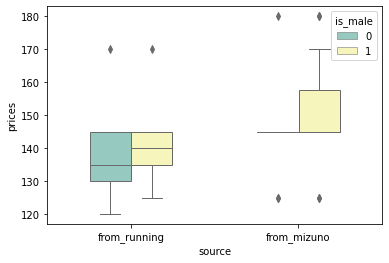

In [28]:
sns.boxplot(x='source',y='prices',hue='is_male',
            data=df,
            width=0.5, linewidth=1, palette='Set3')

# Étape 6: Utiliser la librairie "statsmodels" pour effectuer un modèle linéaire comme indiqué dans le graphe ci-dessous (utiliser des indicatrices comme régresseurs). Il n’est pas demandé que les résultats des estimations soient les mêmes. Une interprétation des résultats est demandée.

In [32]:
import statsmodels.api as sm

X = df[['source', 'is_male']]
Y = df['prices']

def transfer(x):
    if x == 'from_mizuno':
        x = 1
    elif x == 'from_running':
        x = 0
    return x

X['source'] = X['source'].apply(lambda x: transfer(x))

X_model = sm.add_constant(X)

In [33]:
X_model.head()

,const,source,is_male
0,1.0,0,0
1,1.0,0,1
2,1.0,0,1
3,1.0,0,1
4,1.0,0,1


In [34]:
Y.head()

0    135
1    125
2    130
3    135
4    145
Name: prices, dtype: int64

In [35]:
model = sm.OLS(Y, X_model)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.266
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.116
Time:                        06:53:10   Log-Likelihood:                -190.45
No. Observations:                  47   AIC:                             386.9
Df Residuals:                      44   BIC:                             392.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.3578      3.524     38.975      0.000     130.255     144.460
source         8.1253      4.246      1.914      0.062      -0.431      16.682
is_male        3.6670      4.207      0.872      0.388      -4.811      12.145
==============================================================================
Omnibus:                        7.771   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.743
Skew:                           0.858   Prob(JB):                       0.0343
Kurtosis:                       3.704   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interprétation : 

# Étape 7: Utiliser la librairie « scikit-learn » pour construire 2 modèles de prédiction différents. Comparez les deux modèles sur un critère de performance de votre choix et sélectionner le meilleur.

   La variable expliquée dans le problématique est prix ,qui pourrait prendre 7 valeurs possibles ,donc c'est une question de régression. Pour mesurer les performances des modèles, on utilise souvent R^2,SSR,MSE,RMSE et MAE. Les mesures comme courbe ROC et AUC et 
précision de la prédiction ne s'adaptent pas ce problématique . 
Un bon modele devrait avoir une valeur importante en R^2 ,dont interprétation est le rapport de la variance expliquée par la régression SSE sur la variance totale SST. Un bon modele devrait idéalement avoir une valeur faible en SSR,MSE,RMSE et MAE ,d'où l'importance de biais .

In [36]:
def transfer(x):
    if x == 'from_mizuno':
        x = 1
    elif x == 'from_running':
        x = 0
    return x

df['source'] = df['source'].apply(lambda x: transfer(x))

In [37]:
print('number of observations : ',len(df.index))

# training set : 37
# testing set : 10

number of observations :  47


In [38]:
import random

random.seed(40)
train_index = set(random.sample(range(0,47),37))
test_index = set(range(0,47)).difference(train_index)#取差集

train_index = list(train_index)
test_index = list(test_index)

In [39]:
df_train = df.loc[train_index].reset_index(drop=True)#去除原始行标签
df_test = df.loc[test_index].reset_index(drop=True)

# df_train
# df_test

In [40]:
X_train = df_train[['source', 'is_male']]
Y_train = df_train['prices']

X_test = df_test[['source', 'is_male']]
Y_test = df_test['prices']

In [41]:
#def get_accuracy(predict_value, real_value):
    
    #return sum(predict_value == real_value)/len(predict_value)

#def get_R_2(predict_value, real_value):
    #return 

def get_RMSE(predict_value, real_value):
    
    return math.sqrt(sum((predict_value - real_value)**2/len(predict_value)))

In [42]:
# méthode 1: random forêt

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=2, max_depth=None,
                            min_samples_split=2, random_state=0)

rf.fit(X_train, Y_train)

Y_test_pre = rf.predict(X_test)

In [43]:
#print('accuracy :', get_accuracy(Y_test_pre, Y_test))
print('RMSE :',round(get_RMSE(Y_test_pre, Y_test),3))

accuracy : 0.5
RMSE : 8.944


In [44]:
rmse_list = []
for my_number in range(1,30):
    
    rf = RandomForestClassifier(n_estimators=my_number, max_depth=None,
                                min_samples_split=2, random_state=0)

    rf.fit(X_train, Y_train)

    Y_test_pre = rf.predict(X_test)
    
    rmse_i = get_RMSE(Y_test_pre, Y_test)
    
    rmse_list.append(rmse_i)

Text(0, 0.5, 'RMSE score')

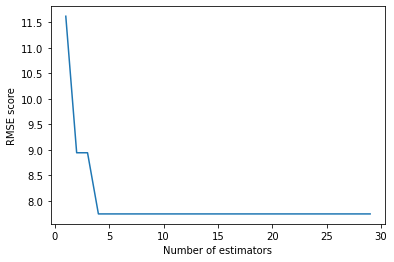

In [45]:
plt.plot(range(1,30), rmse_list)
plt.xlabel("Number of estimators")
plt.ylabel("RMSE score")

In [46]:
# méthode 2: KNN

from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors = 6)
knn.fit(X_train,Y_train)

Y_test_pre = knn.predict(X_test)

In [47]:
#print('accuracy :', get_accuracy(Y_test_pre, Y_test))
print('RMSE :',round(get_RMSE(Y_test_pre, Y_test),3))

accuracy : 0.5
RMSE : 8.944


In [48]:
rmse_list = []
for my_number in range(1,30):
    
    knn = KNN(n_neighbors = my_number)
    
    knn.fit(X_train,Y_train)
    Y_test_pre = knn.predict(X_test)
    
    rmse_i = get_RMSE(Y_test_pre, Y_test)
    
    rmse_list.append(rmse_i)

Text(0, 0.5, 'RMSE')

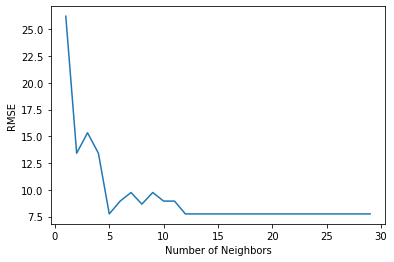

In [49]:
plt.plot(range(1,30), rmse_list)
plt.xlabel("Number of Neighbors")
plt.ylabel("RMSE")

In [50]:
# OLS

X_model = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_model)
results = model.fit()

X_test = sm.add_constant(X_test)
Y_test_pre = results.predict(X_test)

In [51]:
#print('accuracy :', get_accuracy(Y_test_pre, Y_test))
print('RMSE :',round(get_RMSE(Y_test_pre, Y_test),3))

accuracy : 0.0
RMSE : 8.595


In [70]:
X = df[['source', 'is_male']]
Y = df['prices']

from sklearn.model_selection import cross_val_score

# cross_val_score(KNN,X,Y,cv=10)

# Validation Croisée

In [93]:
# cross val score

from sklearn.model_selection import GridSearchCV
import prettytable as pt

class grid:
  def __init__(self, model):
    self.model = model

  def grid_get(self, X, Y, parameter):
    grid_search = GridSearchCV(self.model, parameter, cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X, Y)
    
    tb= pt.PrettyTable()
    
    print('best model :')
    print(grid_search.best_params_)
    print('RMSE:')
    print(round(np.sqrt(-grid_search.best_score_),3))
    print()
    print('all the possible model :')
    print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']])   

In [151]:
X = df[['source', 'is_male']]
Y = df['prices']

In [95]:
print(" KNN:\n")
param_grid = {'n_neighbors': range(1,30)}
grid(KNN()).grid_get(X, Y, param_grid)

 KNN:

best model :
{'n_neighbors': 16}
RMSE:
14.205

all the possible model :
                 params  mean_test_score  std_test_score
0    {'n_neighbors': 1}      -517.111111      188.306176
1    {'n_neighbors': 2}      -353.388889      179.478875
2    {'n_neighbors': 3}      -270.722222       93.467100
3    {'n_neighbors': 4}      -273.055556       73.724964
4    {'n_neighbors': 5}      -206.666667       40.680553
5    {'n_neighbors': 6}      -208.888889       40.253441
6    {'n_neighbors': 7}      -209.388889       40.372647
7    {'n_neighbors': 8}      -209.388889       40.372647
8    {'n_neighbors': 9}      -218.888889       46.824798
9   {'n_neighbors': 10}      -218.888889       46.824798
10  {'n_neighbors': 11}      -218.888889       46.824798
11  {'n_neighbors': 12}      -210.000000       52.398933
12  {'n_neighbors': 13}      -216.666667       47.661033
13  {'n_neighbors': 14}      -218.666667       49.506640
14  {'n_neighbors': 15}      -218.666667       49.506640
15  {'n_n

In [96]:
print(" random forêt:\n")
param_grid = {'n_estimators': range(1,30),
              'max_depth': [None],
              'min_samples_split': [2],
              'random_state': [0]}
grid(RandomForestClassifier()).grid_get(X, Y, param_grid)

 random forêt:

best model :
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1, 'random_state': 0}
RMSE:
14.422

all the possible model :
                                               params  mean_test_score  \
0   {'max_depth': None, 'min_samples_split': 2, 'n...      -208.000000   
1   {'max_depth': None, 'min_samples_split': 2, 'n...      -223.555556   
2   {'max_depth': None, 'min_samples_split': 2, 'n...      -216.888889   
3   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
4   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
5   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
6   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
7   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
8   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
9   {'max_depth': None, 'min_samples_split': 2, 'n...      -218.888889   
10  {'max_depth': None, 'min_samples

# Les autres méthodes dans le sklearn

In [196]:
from PIL import ImageFont, Image, ImageDraw

In [173]:
X_train = df_train[['source', 'is_male']]
Y_train = df_train['prices']

X_test = df_test[['source', 'is_male']]
Y_test = df_test['prices']

In [ ]:
def get_accuracy(predict_value, real_value):
    
    return sum(predict_value == real_value)/len(predict_value)

def get_RMSE(predict_value, real_value):
    
    return math.sqrt(sum((predict_value - real_value)**2/len(predict_value)))

In [202]:
def try_different_method(model):
    model.fit(X_train,Y_train)
    score = model.score(X_test, Y_test) #R ^2
    result = model.predict(X_test)
    RMSE= round(get_RMSE(result, Y_test),3)
    #plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(result)), Y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title(model)
    plt.legend()
    draw = ImageDraw.Draw(model)
    draw.text((0, 1),'score :',score,(255,255,0))
    draw = ImageDraw.Draw(model)
    #plt.show()
    #print(model,'R^2 :', score)
    #print(model,'RMSE :',round(get_RMSE(result, Y_test),3))     

In [200]:

####1. Régression linéaire####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####2. Algorithme d'arbre de décision###
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3. Régression de KNN####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####4.Régression de SVM (Support Vector Machine)####
from sklearn import svm
model_SVR = svm.SVR()
####5. Régression de Random Forêt####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=5)#on utilise 5 arbres de décision
####6. Régression de Adaboost####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=10)#on utilise 10 arbres de décision
####7. Régression de GBRT####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=15)#on utilise 15 arbres de décision
####8. Régression de Bagging####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####9. Régression de ExtraTree####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()
####10. Régression Bayesian ARD
model_ARDRegression = linear_model.ARDRegression()
####11. Régression Bayesian Ridge
model_BayesianRidge = linear_model.BayesianRidge()
####12. TheilSen
linear_model.TheilSenRegressor()
####13. RANSAC
model_RANSACRegressor = linear_model.RANSACRegressor()


AttributeError: 'LinearRegression' object has no attribute 'load'

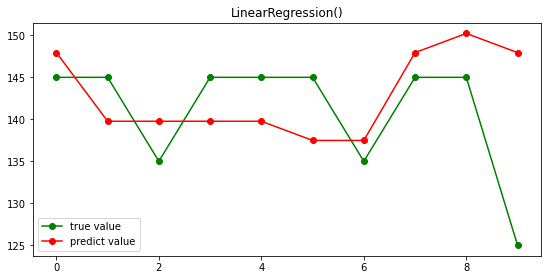

In [203]:
plt.figure(figsize=(20,30))
plt.subplot(6,2,1)
try_different_method(model_LinearRegression)
plt.subplot(6,2,2)
try_different_method(model_DecisionTreeRegressor)
plt.subplot(6,2,3)
try_different_method(model_KNeighborsRegressor)
plt.subplot(6,2,4)
try_different_method(model_SVR)
plt.subplot(6,2,5)
try_different_method(model_RandomForestRegressor)
plt.subplot(6,2,6)
try_different_method(model_AdaBoostRegressor)
plt.subplot(6,2,7)
try_different_method(model_GradientBoostingRegressor)
plt.subplot(6,2,8)
try_different_method(model_BaggingRegressor)
plt.subplot(6,2,9)
try_different_method(model_ExtraTreeRegressor)
plt.subplot(6,2,10)
try_different_method(model_ARDRegression)
plt.subplot(6,2,11)
try_different_method(model_BayesianRidge)
plt.subplot(6,2,12)
try_different_method(model_TheilSenRegressor)
#try_different_method(model_RANSACRegressor)

AttributeError: 'LinearRegression' object has no attribute 'load'

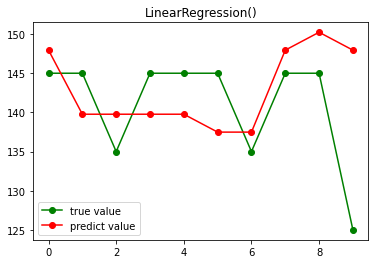

In [204]:
try_different_method(model_LinearRegression)

In [ ]:
# OLS

X_model = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_model)
results = model.fit()

X_test = sm.add_constant(X_test)
Y_test_pre = results.predict(X_test)

print('accuracy :', get_accuracy(Y_test_pre, Y_test))
print('RMSE :',round(get_RMSE(Y_test_pre, Y_test),3))

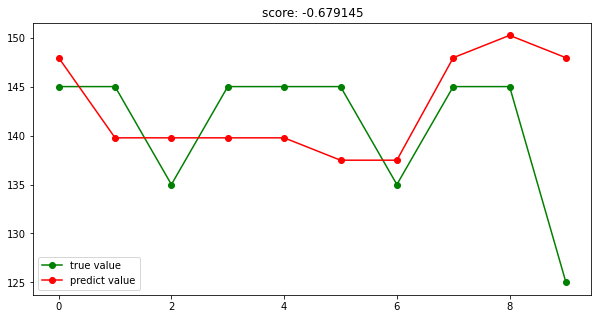

accuracy : 0.0
RMSE : 8.595


In [139]:
try_different_method(model_LinearRegression)

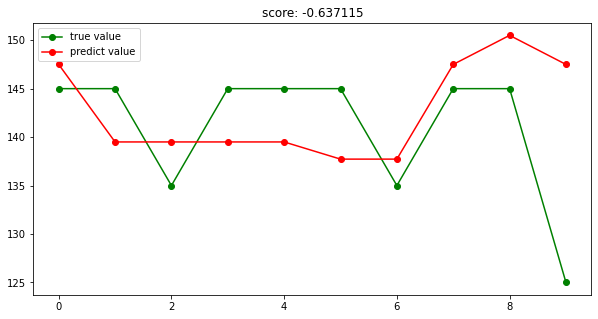

accuracy : 0.0
RMSE : 8.487


In [138]:
try_different_method(model_DecisionTreeRegressor)

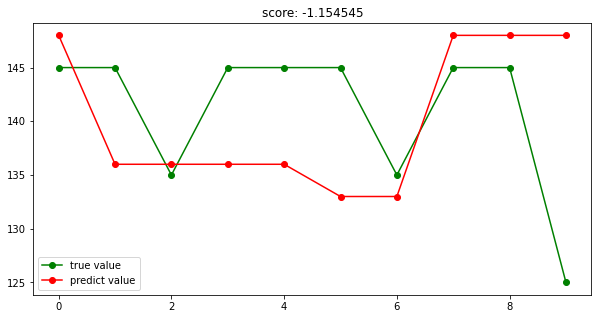

accuracy : 0.0
RMSE : 9.737


In [141]:
try_different_method(model_KNeighborsRegressor)

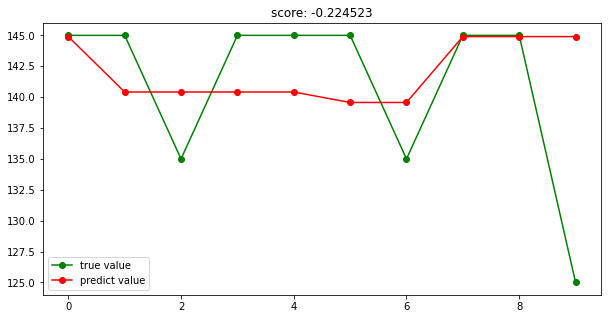

accuracy : 0.0
RMSE : 7.34


In [140]:
try_different_method(model_SVR)

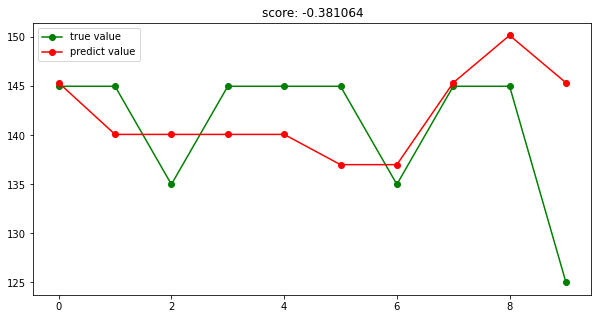

accuracy : 0.0
RMSE : 7.795


In [142]:
try_different_method(model_RandomForestRegressor)

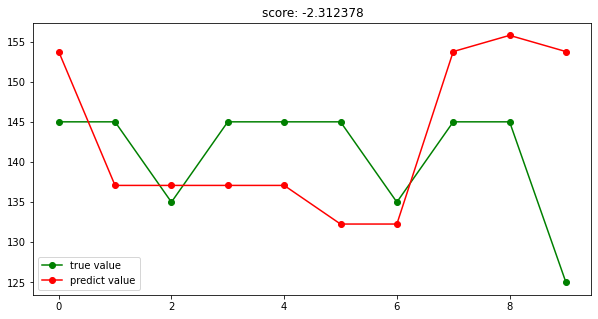

accuracy : 0.0
RMSE : 12.072


In [143]:
try_different_method(model_AdaBoostRegressor)

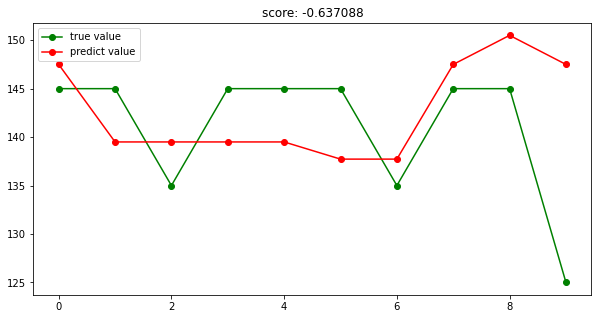

accuracy : 0.0
RMSE : 8.487


In [144]:
try_different_method(model_GradientBoostingRegressor)

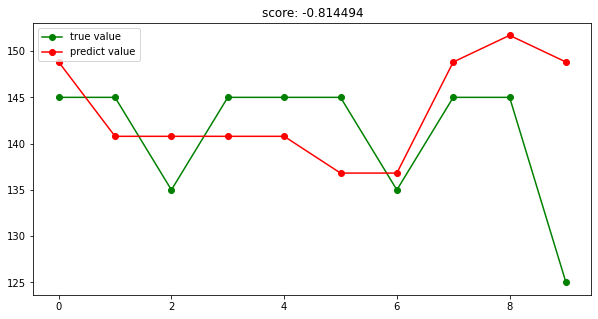

accuracy : 0.0
RMSE : 8.935


In [145]:
try_different_method(model_BaggingRegressor)

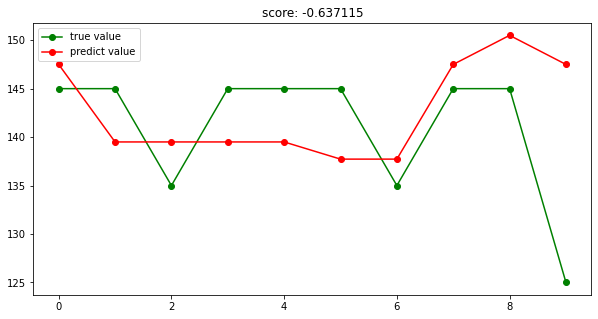

accuracy : 0.0
RMSE : 8.487


In [146]:
try_different_method(model_ExtraTreeRegressor)

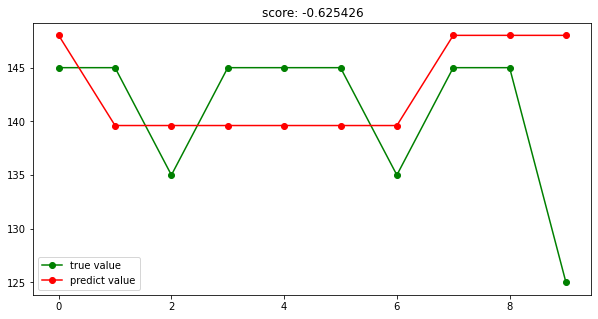

accuracy : 0.0
RMSE : 8.457


In [147]:
try_different_method(model_ARDRegression)

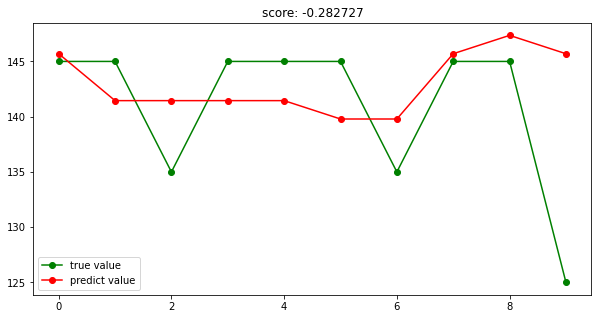

accuracy : 0.0
RMSE : 7.513


In [148]:
try_different_method(model_BayesianRidge)

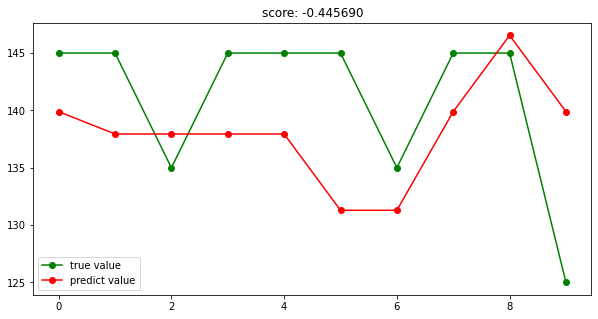

accuracy : 0.0
RMSE : 7.976


In [149]:
try_different_method(model_TheilSenRegressor)

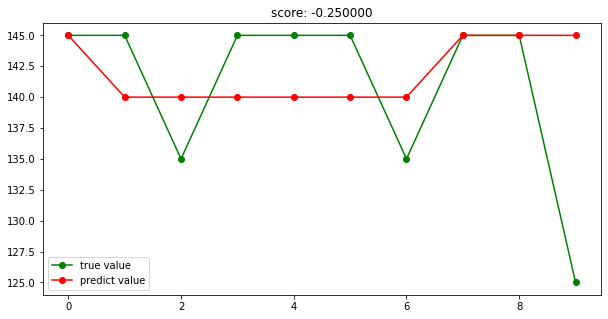

accuracy : 0.3
RMSE : 7.416


In [150]:
try_different_method(model_RANSACRegressor)